In [1]:
import pandas as pd
import igraph as ig
import auxiliar_path
import numpy as np
from kmodes import KModes
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

### Global variables

DATASET = "AMZ" # AMZ, HC, PM, UN, TOY
NODE_TYPE = True # TRUE = User      FALSE = Resources

PATH_DATASET = auxiliar_path.get_path_dataset(DATASET)
PATH_NODETYPE = auxiliar_path.get_path_topbot(NODE_TYPE)

GLOBAL_PATH = "/Users/ddiaz/Documents/code/phd-thesis-lab/"

DF_PATH = (
    GLOBAL_PATH + "12-third_year/00-Data/" + PATH_DATASET + 
    "/01-DistributionsCSV/" + DATASET + "-MOD.csv"
    )
GRAPH_PATH = (
    GLOBAL_PATH +
    "12-third_year/00-Data/01-AMZ/02-Graphs/01-Top/AMZ_top_hyperbolic_DF_alpha1.graphml"
    )

In [3]:
### Read GRAPH
g = ig.read(GRAPH_PATH)
#g = g.bipartite_projection(which=False)
print(g.summary(), "\n")
print("Graph info:")
print("\t|V| =", g.vcount())
print("\t|E| =", g.ecount())
print("\t d  =", g.density())

IGRAPH U-WT 9560 90843 -- 
+ attr: freq (v), id (v), type (v), weight (e) 

Graph info:
	|V| = 9560
	|E| = 90843
	 d  = 0.001988158982684504


In [29]:
def get_common_neigh(edge_i, edge_j):
    if edge_i.target == edge_j.target or edge_i.target == edge_j.source:
        return edge_i.target, edge_i.source, edge_j.source
    elif edge_i.source == edge_j.target or edge_i.source == edge_j.source:
        return edge_i.source, edge_i.target, edge_j.target
    return -1, -1, -1


sim_matrix = []
for i in g.es:
    for j in g.es:
        common, ni, nj = get_common_neigh(i, j)
        if common >= 0:
            neis_i = set(g.neighbors(ni))
            neis_j = set(g.neighbors(nj))
            jaccIdx = len(neis_i.intersection(neis_j)) / len(neis_i.union(neis_j))
            sim_matrix.append(jaccIdx)
        else:
            sim_matrix.append(0)

print(len(sim_matrix))
sim_matrix=np.array(sim_matrix).reshape(g.ecount(), g.ecount())

225


In [4]:
import numpy as np
from scipy.sparse import lil_matrix

# Número de aristas
m = g.ecount()

# Matriz dispersa en formato LIL (para eficiente construcción)
sim_matrix = lil_matrix((m, m))

# Precomputar vecinos de cada nodo
neighbors_dict = {v: set(g.neighbors(v)) for v in range(g.vcount())}

# Iterar solo sobre pares de aristas que comparten un nodo
for edge_i in range(m):
    ni, nj = g.es[edge_i].tuple  # Nodos de la arista i
    neis_i = neighbors_dict[ni]

    for edge_j in range(edge_i, m):  # Solo considerar j >= i para evitar cálculos redundantes
        nk, nl = g.es[edge_j].tuple  # Nodos de la arista j
        neis_j = neighbors_dict[nk]

        if ni == nk or ni == nl or nj == nk or nj == nl:  # Solo considerar aristas que compartan nodo
            intersection_size = len(neis_i & neis_j)
            union_size = len(neis_i | neis_j)
            if union_size > 0:
                jaccIdx = intersection_size / union_size
                sim_matrix[edge_i, edge_j] = jaccIdx
                sim_matrix[edge_j, edge_i] = jaccIdx  # Matriz simétrica

# Convertir a formato CSR para eficiencia en acceso
sim_matrix = sim_matrix.toarray()


KeyboardInterrupt: 

In [4]:
sim_matrix

<15x15 sparse matrix of type '<class 'numpy.float64'>'
	with 111 stored elements in Compressed Sparse Row format>

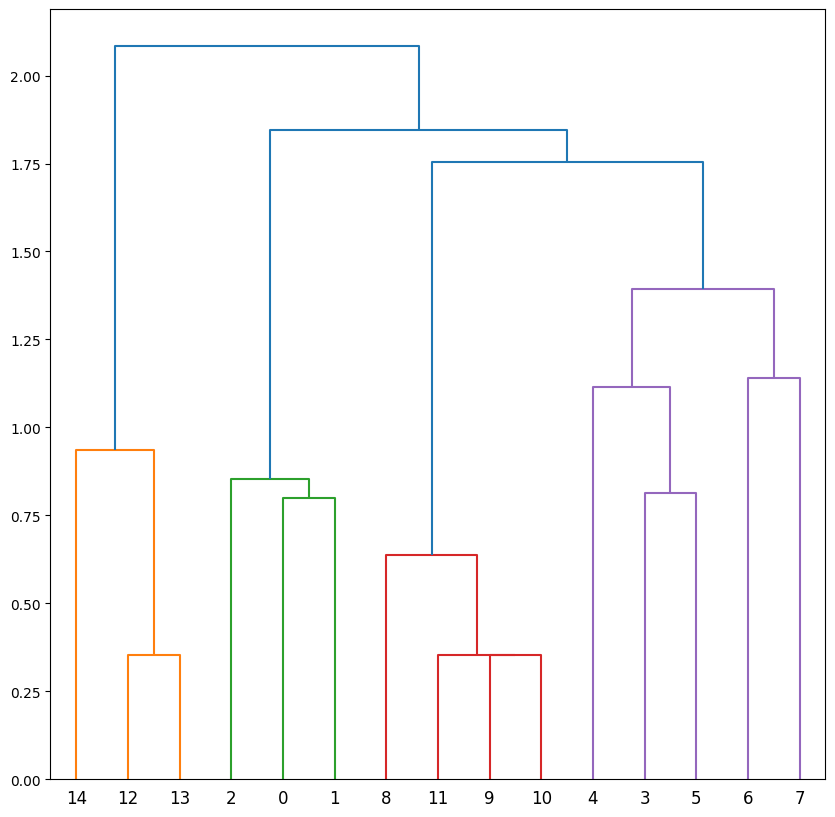

In [8]:
Z = linkage(sim_matrix, 'single')
fig = plt.figure(figsize=(10,10))
dn = dendrogram(Z)
plt.show()

In [10]:
idices=[]
for edge in g.es:
    idices.append(edge.index)


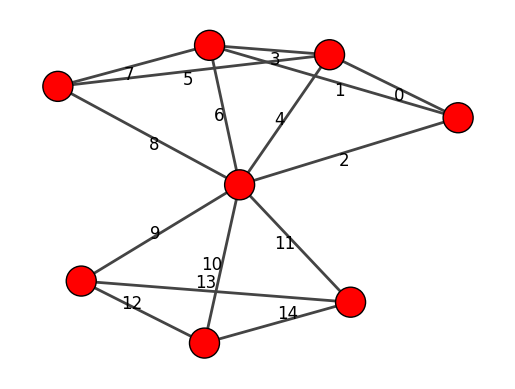

In [11]:
fig, ax = plt.subplots()
layout = g.layout("kk")
ig.plot(g, layout=layout, edge_label=idices, target=ax)

In [52]:
len(set(labels))

4

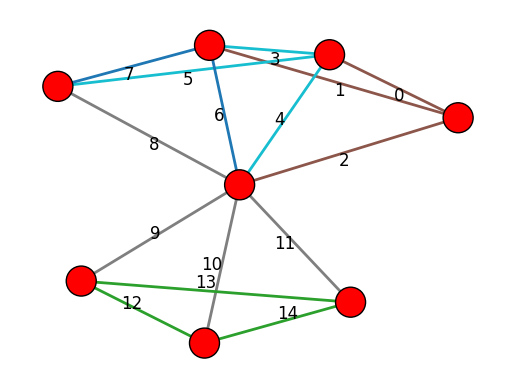

In [12]:

threshold = 1.2 
labels = fcluster(Z, threshold, criterion='distance')
g.es["cluster"] = labels

num_clusters = len(set(labels))

cmap = plt.get_cmap("tab10", num_clusters)

edge_colors = [cmap(label % num_clusters) for label in labels]

fig, ax = plt.subplots()
layout = g.layout("kk")
ig.plot(g, layout=layout, edge_label=idices,edge_color=edge_colors, target=ax)


In [30]:
### Read GRAPH
GRAPH_PATH = (
    GLOBAL_PATH +
    "12-third_year/00-Data/02-HC/02-Graphs/01-Top/HC_top_weights_DF_alpha15.graphml"
)
g = ig.read(GRAPH_PATH)
print(g.summary(), "\n")
print("Graph info:")
print("\t|V| =", g.vcount())
print("\t|E| =", g.ecount())
print("\t d  =", g.density())

IGRAPH U-WT 31 62 -- 
+ attr: freq (v), id (v), type (v), weight (e) 

Graph info:
	|V| = 31
	|E| = 62
	 d  = 0.13333333333333333


/Users/ddiaz/Documents/code/envs/tesis/lib/python3.10/site-packages/igraph/io/files.py:295: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:488
  return reader(f, *args, **kwds)


In [23]:
def get_common_neigh(edge_i, edge_j):
    if edge_i.target == edge_j.target or edge_i.target == edge_j.source:
        return edge_i.target, edge_i.source, edge_j.source
    elif edge_i.source == edge_j.target or edge_i.source == edge_j.source:
        return edge_i.source, edge_i.target, edge_j.target
    return -1, -1, -1


sim_matrix = []
for i in g.es:
    for j in g.es:
        common, ni, nj = get_common_neigh(i, j)
        if common >= 0:
            neis_i = set(g.neighbors(ni))
            neis_j = set(g.neighbors(nj))
            jaccIdx = len(neis_i.intersection(neis_j)) / len(neis_i.union(neis_j))
            sim_matrix.append(jaccIdx)
        else:
            sim_matrix.append(0)

sim_matrix=np.array(sim_matrix).reshape(g.ecount(), g.ecount())

In [24]:
Z = linkage(sim_matrix, 'single')

In [ ]:
threshold = 2  
labels = fcluster(Z, threshold, criterion='distance')
g.es["cluster"] = labels
num_clusters = len(set(labels))
print(num_clusters)

6


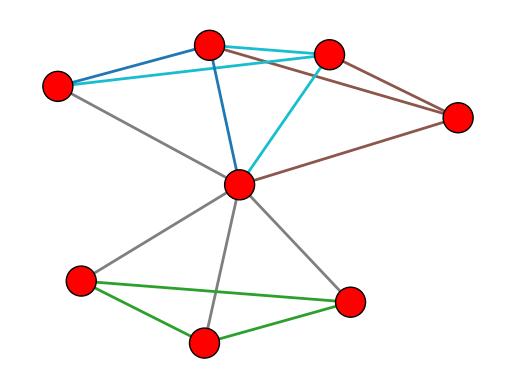

In [13]:

threshold = 1.2  
labels = fcluster(Z, threshold, criterion='distance')
g.es["cluster"] = labels
num_clusters = len(set(labels))

cmap = plt.get_cmap("tab10", num_clusters)

edge_colors = [cmap(label % num_clusters) for label in labels]

fig, ax = plt.subplots()
layout = g.layout("kk")
ig.plot(g, layout=layout,edge_color=edge_colors, target=ax)

#http://127.0.0.1:8888/tree?token=db405ec22506276c042af2410b1d6ec8e46493b3daf27f56